In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab1.ipynb")

![](img/571_lab_banner.png)

# Lab 1: Decision trees and machine learning fundamentals

<br><br>

## Imports

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert-warning">
    
## Instructions  
rubric={mechanics}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Read the **[Use of Generative AI Policy](https://ubc-mds.github.io/policies/)**.
  
- Review the **[General Lab Instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)**.
    
- Check the **[MDS Rubrics](https://github.com/UBC-MDS/public/tree/master/rubric)** for grading criteria.

### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.
    
- **Include a clickable link to your GitHub repository** below this cell.

- Make at least 3 commits to your GitHub repository and ensure it's up to date. If Gradescope becomes inaccessible, we'll grade the most recent GitHub version submitted before the deadline.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  



### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Points:_ 4

YOUR REPO LINK GOES HERE

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
## Warmup with toy dataset 

</div>

<div class="alert alert-info">

### Warmup activity

What's your studying or working style?

Below is a simple decision tree model trained to **predict what type of student you are based on your studying style**.

Follow the branches and see where you end up. Does this model predict you correctly?

#### Features

* **Daily stress level:** How tense or relaxed you usually feel (scale 1–10).

* **Daily social media time:** How many hours you spend scrolling or chatting online.

* **Sleep hours the night before a deadline:** How many hours do you typically sleep the night before an assignment, quiz, or project is due?

#### Predicted student types

* **Planner:** Organized, consistent, planns everything ahead of time.
  
* **Procrastinator:** Starts late and scrambles to finish.
* **Chill:** Chill, low stress, enjoys life, has steady routines.
* **Last minute genius:** Works best under pressure, bursts of inspiration right before the deadline.



</div>

![](img/lab1_e1.png)

Attrbutions: Image created by ChatGPT 5.0

<div class="alert alert-info">

Let's review the terminologies in machine learning together! (You are **NOT** graded on this warm-up task)

**Your Task:**

Please fill in each of the following sentences using the provided machine learning terminologies from the list below. Keep in mind that each term should be used only once!

**List of Terms (in no particular order):**

    a) hyperparameters
    b) training
    c) tree depth
    d) parameters
    e) example/data point
    f) features
    g) target
    h) root node
    i) branch
    j) leaf node


1. The type of student we are trying to predict — chill, planner, last-minute genius, or procrastinator — represents the variable we aim to predict or explain. It is called the (g).

2. The measurable inputs such as stress level, social media time, and sleep hours are known as (f).

3. Each individual row in the dataset, containing both the input values (features) and the corresponding output (target), is referred to as an (e).

4. In the decision tree above, the very first question ("Daily stress level < 7?") is the starting point of the model. It is called the (h).

5. The number of levels or layers from the initial question down to the final prediction in a decision tree is known as the (c).

6. Before building the decision tree, we specify certain configuration settings such as the maximum tree depth. These controllable settings are called (a).


</div>

<br><br>

## Exercise 1: Decision trees with a toy dataset 
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, whether there is work-hour flexibility, and whether the company is a start-up or not. So the `X` of your offer data looks as follows: 

In [3]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0, 1],
    "work_hour_flexibility": [0, 0, 1, 1],
    "start_up": [0, 1, 1, 1],    
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


Your goal is to get predictions for these rows. In other words, for each row, you want to predict whether that job would make you **happy** or **unhappy**.   

So you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

Suppose you get the following data from this toy survey. You decide to train a machine learning model using this toy survey data and use this model to predict which job from `offer_df` is likely to make you happy. 

In [4]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


<br><br>

<div class="alert alert-info">
    
### 1.1 Decision stump by hand 
rubric={autograde}

**Your tasks:**

Using this toy dataset, manually build a decision stump (a decision tree with only one split) based on the condition:

```
supportive_colleagues <= 0.5
```

1. What training accuracy would you obtain with this decision stump?
2. Save the accuracy (as a decimal) in an object named `supportive_colleagues_acc`.

> Note: You are expected to do this question by hand with a pen and paper. You do not need to show any calculations or code.
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [5]:
supportive_colleagues_acc = None

# BEGIN SOLUTION

supportive_colleagues_acc = 0.9

# END SOLUTION

In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.2 Separating features and target
rubric={autograde}

Recall that in `scikit-learn`, before building a classifier, we need to separate features and target. 

**Your tasks:**

1. Separate features and target from `train_df` and save them in `X_train_toy` and `y_train_toy`, respectively.

</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 1

In [7]:
X_train_toy = None
y_train_toy = None

# BEGIN SOLUTION

X_train_toy = train_df.drop(columns=["target"])
y_train_toy = train_df["target"]

# END SOLUTION

In [8]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.3 Create a decision tree classifier object
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` object with `random_state=16` and store it in a variable called `toy_tree`.

</div>

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 1

In [9]:
toy_tree = None

# BEGIN SOLUTION

# instantiate a class of the DecisionTreeClassifier
toy_tree = DecisionTreeClassifier(random_state=16)

# END SOLUTION

In [10]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.4 `fit` the decision tree classifier 
rubric={autograde}

**Your tasks:**

1. Now train a decision tree model by calling `fit` on `toy_tree` with `X_train_toy` and `y_train_toy` created above.

</div>

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 1

In [11]:
# BEGIN SOLUTION

# fit the model to the data. The semicolon at the end is used to suppress displaying the output of model.fit
toy_tree.fit(X_train_toy, y_train_toy)

# END SOLUTION

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,16
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
grader.check("q1.4")

q1.4 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 1.5 Visualize the trained decision tree
rubric={autograde}


**Your tasks:**
- Visualize the trained decision tree model using the [`tree.plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) method in `sklearn` by passing the appropriate values for the following arguments: 
    - `feature_names`
    - `class_names`
  
Save the names of the features in `feature_names` variable, names of the classes in `class_names` variable and the visualization tree returned by the function in a variable called `toy_tree_viz`.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 2

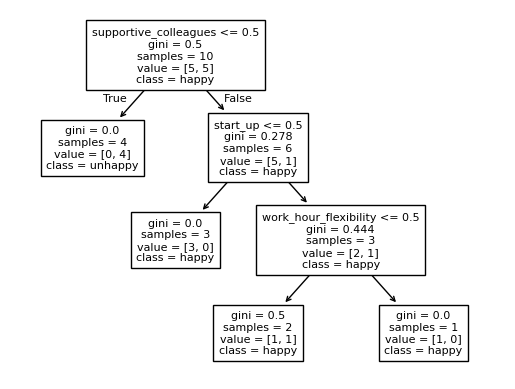

In [13]:
from sklearn import tree
toy_tree_viz = None
feature_names = [] # feature names 
class_names = [] # unique class names 

# BEGIN SOLUTION
feature_names = X_train_toy.columns.tolist()
class_names = y_train_toy.unique().tolist()
toy_tree_viz = tree.plot_tree(toy_tree, 
                              feature_names = feature_names, 
                              class_names = class_names,
                              fontsize=8);
# END SOLUTION

In [14]:
grader.check("q1.5")

q1.5 results: All test cases passed!

<br><br>

You should see that the tree has a depth of 3. We can also access this value directly using the `get_depth()` function of the tree object:

In [15]:
toy_tree.get_depth()

3

<br><br>

<div class="alert alert-info">
    
### 1.6 Accuracy calculation
rubric={autograde}

**Your tasks:**

1. Evaluate the `toy_tree` on the training data (i.e., call `score()` on `X_train_toy` and `y_train_toy`) and store the score in a variable called `train_acc`.

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 1

In [16]:
train_acc = None

# BEGIN SOLUTION
train_acc = toy_tree.score(X_train_toy, y_train_toy)
train_acc
# END SOLUTION

0.9

In [17]:
grader.check("q1.6")

q1.6 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 1.7 Discussion
rubric={reasoning}

**Your tasks:**

1. Do you achieve perfect training accuracy? If so, what are the reasons behind this, and if not, what factors contribute to the imperfection?

</div>

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

We do not get perfect training accuracy. Notice that the model made an "error" on example with index 8; the original target is "unhappy" and the predicted one is "happy". This is because we have some inconsistency in the training data; we have two examples in the dataset with exactly the same feature vectors but different targets.

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 1.8 Predicting on the offer data 
rubric={autograde}

**Your tasks:**

1. Using the trained decision tree above, predict the targets for all examples in `offer_df` and store them as a list in the `predictions` variable below.
2. In which jobs you are likely to be happy? Append the index or indices of all the examples where you are likely to be happy to the `happy_job_indices` list below.

</div>

In [18]:
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


<div class="alert alert-warning">

Solution_1.8
    
</div>

_Points:_ 3

In [19]:
predictions = []
happy_job_indices = []

# BEGIN SOLUTION
predictions = toy_tree.predict(offer_df).tolist()
happy_job_indices = [i for (i, pred) in enumerate(predictions) if pred == "happy"]
# END SOLUTION

In [20]:
grader.check("q1.8")

q1.8 results: All test cases passed!

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

<div class="alert alert-info">
    
## Decision trees on Spotify Song Attributes dataset 

</div>

## Exercise 2: Data and Exploratory Data Analysis (EDA)

For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory.

> You will not be able to push it to your repository (hopefully) because I have seeded the repository with `.gitignore`. 

<div class="alert alert-info">
    

### 2.1 Reading the data CSV
rubric={autograde}
 
**Your tasks:**
1. Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

> Make sure you have put the data CSV as `spotify.csv` under the data directory (data/spotify.csv). When you read the data file, use this relative path for the autograder to work properly on Gradescope.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [21]:
spotify_df = None

# BEGIN SOLUTION

spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.head()

# END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [22]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 2.2 Data splitting 
rubric={autograde

**Your tasks:**

1. Split the dataframe into `train_df` and `test_df` with `random_state=123` and `test_size=0.2`. 

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [23]:
train_df = None
test_df = None

# BEGIN SOLUTION
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
# END SOLUTION

In [24]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    
### 2.3 Number of training and test examples
rubric={autograde}

**Your tasks:**
1. How many training and test examples do we have? Store them as integers in the variables below.

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 1

In [25]:
# Please provide integer values
n_train_samples = None
n_test_samples = None

# BEGIN SOLUTION
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]
# END SOLUTION

In [26]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

Typically, when developing machine learning pipelines, a large portion of the work goes into exploratory data analysis (EDA). This step helps you understand both your data and your prediction task before modeling. In this lab, due to time constraints, we'll only examine the output of a few basic methods. Let's begin with the `info` and `describe` methods of a pandas DataFrame.

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, 1505 to 1534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1613 non-null   float64
 1   danceability      1613 non-null   float64
 2   duration_ms       1613 non-null   int64  
 3   energy            1613 non-null   float64
 4   instrumentalness  1613 non-null   float64
 5   key               1613 non-null   int64  
 6   liveness          1613 non-null   float64
 7   loudness          1613 non-null   float64
 8   mode              1613 non-null   int64  
 9   speechiness       1613 non-null   float64
 10  tempo             1613 non-null   float64
 11  time_signature    1613 non-null   float64
 12  valence           1613 non-null   float64
 13  target            1613 non-null   int64  
 14  song_title        1613 non-null   object 
 15  artist            1613 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory u

We can see that there are no missing values. Most features are numeric (`float64` or `int64`), with two object-type columns (`song_title` and `artist`).

<br><br>

The `describe` method provides quick summary statistics of the training data. By default, it summarizes numeric columns and returns a DataFrame.

In [28]:
spotify_summary = train_df.describe()
spotify_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185627,0.616745,247114.827650,0.681296,0.136862,5.383137,0.189189,-7.112929,0.621203,0.091277,121.979777,3.964662,0.497587,0.507750
std,0.259324,0.163225,81177.300308,0.211612,0.277744,3.620422,0.153170,3.838867,0.485238,0.087890,26.965641,0.255201,0.247378,0.500095
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009190,0.511000,200105.000000,0.564000,0.000000,2.000000,0.092300,-8.388000,0.000000,0.037300,100.518000,4.000000,0.295000,0.000000
50%,0.062500,0.629000,230200.000000,0.714000,0.000071,6.000000,0.127000,-6.248000,1.000000,0.054900,121.990000,4.000000,0.496000,1.000000
75%,0.251000,0.738000,272533.000000,0.844000,0.057300,9.000000,0.243000,-4.791000,1.000000,0.107000,137.932000,4.000000,0.690000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


From the summary, notice a few key points:

- The dataset has good variety in features like tempo, loudness, energy, and valence (mood).

- Most songs aren't very acoustic or instrumental (both are heavily skewed toward 0).

- Danceability and energy are fairly high overall.

- Valence (mood) spans the full range, and the target variable is roughly balanced between 0 and 1.

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.4 Plotting histograms 
rubric={viz}

The starter code below produces histograms for the `loudness` feature using pandas plotting. The histograms show the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using `matplotlib` and pandas plotting here. This is a manually graded question and you can use altair instead, as you're learning it in DSCI 531. I've added `altair` in the course environment and it'll also work fine on Gradescope.

</div>

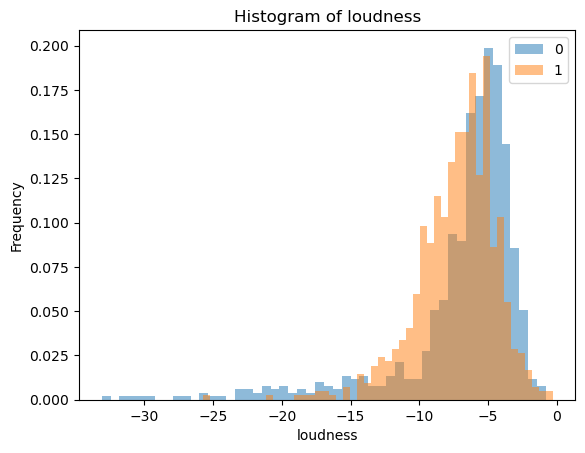

In [29]:
feat = "loudness"
train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat);
plt.xlabel(feat);

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 3

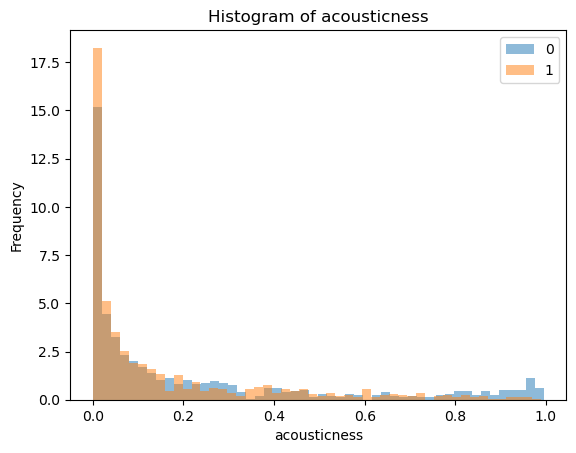

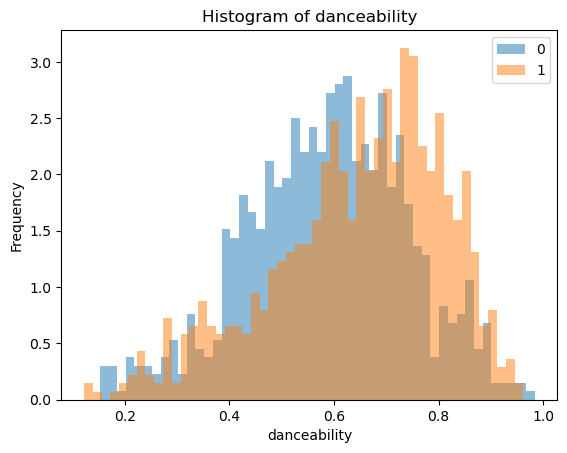

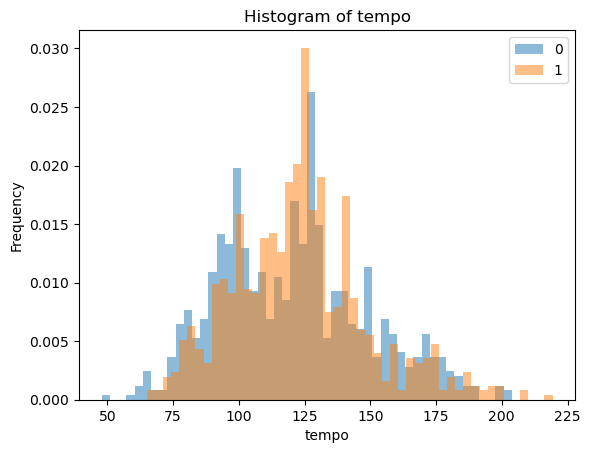

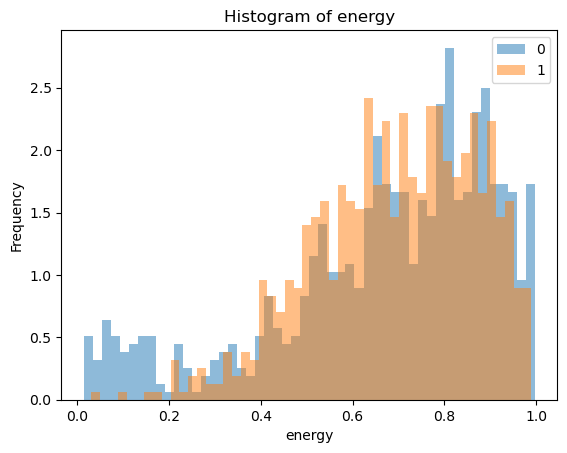

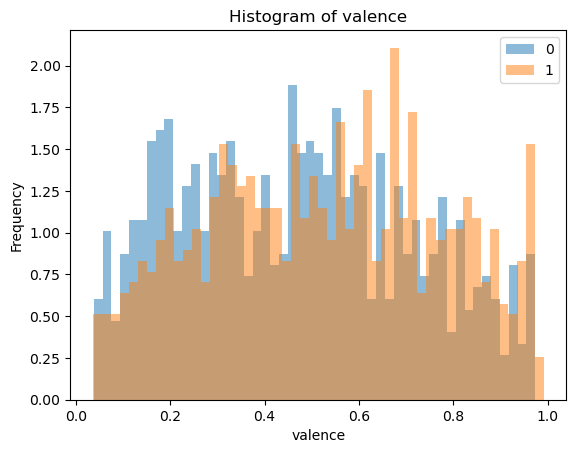

In [30]:
# BEGIN SOLUTION
features = [
    "acousticness",
    "danceability",
    "tempo",
    "energy",
    "valence",
]
for feat in features:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title="Histogram of " + feat)
    plt.xlabel(feat)
    plt.show()
# END SOLUTION

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.5 Identical histograms
rubric={reasoning}

**Your tasks:**

1. Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class? Briefly explain.

</div>

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

No, the feature might still be useful, because it may be predictive in conjunction with other features. For example, the valence feature histograms (above) do indeed look quite overlapping. But it may be the case that very high valence in conjunction with low tempo is very predictive of a liked song. This type of pattern would not emerge in these individual histograms, but a decision tree could potentially still learn it.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.6 Which columns to include? 
rubric={reasoning}

Note that the dataset includes two text features labeled `song_title` and `artist`.

**Your tasks:**

1. Do you believe that these features could be valuable in predicting whether the user liked the song or not? If so, what makes them suitable, and if not, what makes them unsuitable?
2. Do you anticipate any challenges in using these features in their current form within your model? Please provide a brief explanation.

</div>

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

The `song_title` and `artist` features can definitely be useful in predicting whether the user liked the song or not. For example, the user can have a strong preference for an artist or particular particular kind of songs. That said, free text columns are a bit tricky to use directly in your `X`; they need to be encoded in numbers so that we can use them in machine learning models. These columns could also be considered as categorical columns rather than free text columns but too many unique categories might be a problem. One way to deal with this could be first categorizing them into more coarse-grained categories and then treating them as categorical variables. 

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

## Exercise 3: Model building
<hr>

Now that we did some preliminary exploratory data analysis (EDA), let's move on to modeling. 

<br><br>

The first step we need to do is to separate `X` and `y` from `train_df` and `test_df` from the previous exercise and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. We will skip the `song_title` and `artist` columns for now. 

In [31]:
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

<br><br>

<br><br>

<div class="alert alert-info">
    
### 3.1 The baseline model: `DummyClassifier`
rubric={autograde}

**Your tasks:**
1. Carry out 10-fold cross-validation using `DummyClassifier` with `random_state=123`. Store the mean cross-validation score in the `dummy_score` variable below.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 1

In [32]:
dummy_score = None
# BEGIN SOLUTION
dummy = DummyClassifier(random_state=123)
dummy_score = cross_val_score(dummy, X_train, y_train, cv=10).mean()
dummy_score
# END SOLUTION

np.float64(0.5077524729698643)

In [33]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 3.2 The decision tree model
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable named `spotify_tree`.  

2. Perform 10-fold cross-validation with the `spotify_tree` object using `cross_validate` on `X_train` and `y_train`.  
   - Include the parameter `return_train_score=True`.  
   - Save the cross-validation results as a pandas DataFrame in a variable called `dt_scores_df`.

</div>

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 5

In [34]:
spotify_tree = None
dt_scores_df = None

# BEGIN SOLUTION
spotify_tree = DecisionTreeClassifier(random_state=123)
dt_scores_df = pd.DataFrame(
    cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
)
dt_scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.013939,0.001456,0.697531,0.999311
1,0.013191,0.001454,0.660494,1.000000
2,0.013549,0.001431,0.685185,0.999311
3,0.013699,0.001402,0.639752,1.000000
4,0.013542,0.001574,0.639752,0.999311
5,0.013175,0.001561,0.658385,0.999311
6,0.014096,0.001396,0.639752,0.999311
7,0.014064,0.001380,0.608696,0.999311
8,0.013201,0.001504,0.701863,0.999311
9,0.014915,0.001550,0.695652,0.999311


In [35]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Examining cross-validation scores
rubric={reasoning}

**Your tasks:** 
- Inspect the 10 sub-scores, the range and the average cross-validation score from the 10 folds of cross-validation of decision tree model above.
- To what extent do you trust the reported average cross-validation score of approximately 0.66? Is reporting only the average sufficient to convey the model’s performance? Briefly explain.

</div>

In [36]:
dt_scores_df

,fit_time,score_time,test_score,train_score
0,0.013939,0.001456,0.697531,0.999311
1,0.013191,0.001454,0.660494,1.000000
2,0.013549,0.001431,0.685185,0.999311
3,0.013699,0.001402,0.639752,1.000000
4,0.013542,0.001574,0.639752,0.999311
5,0.013175,0.001561,0.658385,0.999311
6,0.014096,0.001396,0.639752,0.999311
7,0.014064,0.001380,0.608696,0.999311
8,0.013201,0.001504,0.701863,0.999311
9,0.014915,0.001550,0.695652,0.999311


In [37]:
dt_scores_df.mean()

fit_time       0.013737
score_time     0.001471
test_score     0.662706
train_score    0.999449
dtype: float64

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

Looks like there is quite a bit of variation in accuracies in different folds. The cv scores range from 0.60 to 0.72, so the range is fairly large. I would say I don't trust the 0.671 that much, certainly not to three or even two decimal places. I might say "around 0.62-0.70" or something like that.

The training accuracy is much higher than the cross-validation accuracy suggesting that the model is overfit on the training data. 

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

## Exercise 4: Hyperparameters
<hr>

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

<div class="alert alert-info">
    

### 4.1 Train and cross-validation accuracies 
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `np.arange(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy. Store your results in the `results_df` dataframe, where the max_depth is set as the index. 

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 1") if you do so.

</div>

In [38]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_4.1
    
</div>

_Points:_ 6

In [39]:
results_df = None

# BEGIN SOLUTION
cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeClassifier(max_depth = depth, random_state=123)

    # Carry out cross-validation
    scores = cross_validate(dt, X_train, y_train, return_train_score=True)
    cv_train_scores.append(scores['train_score'].mean())
    cv_valid_scores.append(scores['test_score'].mean())

results_df = pd.DataFrame({"mean_train_score": cv_train_scores, 
                           "mean_cv_score": cv_valid_scores
                           },
                           index=depths
                            )
# END SOLUTION

In [40]:
results_df

,mean_train_score,mean_cv_score
1,0.651117,0.645397
3,0.736054,0.700590
5,0.800682,0.718541
7,0.866242,0.704905
9,0.922194,0.702419
11,0.961253,0.688795
13,0.984501,0.681341
15,0.994576,0.679482
17,0.998140,0.682578
19,0.999225,0.682574


In [41]:
results_df.shape

(12, 2)

In [42]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.2 Visualization 
rubric={viz}

1. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. 

**Ensure your plot includes the following:**

1. Both the train accuracy and the cross-validation accuracy are included in the plot.
2. Include a legend to specify which is which. 
3. The provided `max_depth` values are used.
4. The x-axis and y-axis have reasonable names.
5. The data points are correct.

</div>

<div class="alert alert-warning">

Solution_4.2
    
</div>

_Points:_ 5

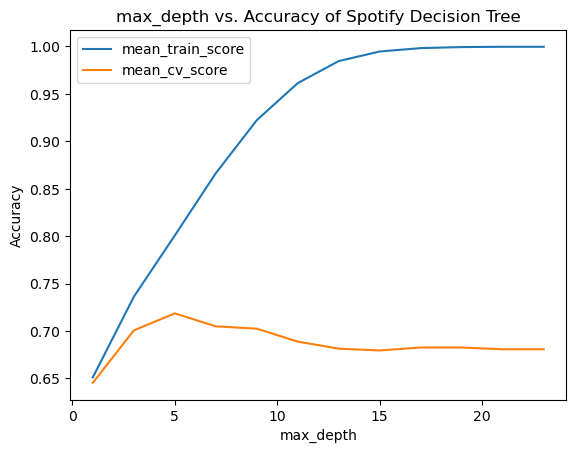

In [43]:
# BEGIN SOLUTION
max_depth_plot = results_df[["mean_train_score", "mean_cv_score"]].plot(title = "max_depth vs. Accuracy of Spotify Decision Tree", ylabel = "Accuracy", xlabel="max_depth")
# END SOLUTION

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.3 `max_depth` and the fundamental tradeoff
rubric={reasoning}

**Your tasks:**
1. Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

</div>

<div class="alert alert-warning">

Solution_4.3
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In case of the training data, a higher value of `max_depth` parameter results in higher accuracy. For `max_depth >= 15` the accuracy is 1.0, which means that the model is able to classify all training examples perfectly. This happens because for higher `max_depth` values, the decision tree learns a specific rule for almost all examples in the training data. In case of the cross-validation scores, initially the accuracy increases a bit and then it goes back down. 


<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 4.4 Picking the "best" value for `max_depth`
rubric={autograde}

**Your tasks:**
1. From these results, pick the "best" `max_depth`, the one which gives the maximum cross-validation score. Store it in a variable called `best_max_depth` as an integer.

</div>

<div class="alert alert-warning">

Solution_4.4
    
</div>

_Points:_ 2

In [44]:
best_max_depth = None

# BEGIN SOLUTION
best_max_depth = results_df["mean_cv_score"].idxmax() 
best_max_depth
# END SOLUTION

np.int64(5)

In [45]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br>

<div class="alert alert-info">
    

### 4.5 Final assessment on the test split 
rubric={autograde}

Now that we have our finalized model, we are ready to evaluate it on the test set. 

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise and `random_state=123`. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below.

</div>

<div class="alert alert-warning">

Solution_4.5
    
</div>

_Points:_ 3

In [46]:
best_model = None
test_score = None

# BEGIN SOLUTION
best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=123)
best_model.fit(X_train, y_train)
test_score = best_model.score(X_test, y_test)
# END SOLUTION

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### 4.6 Analysis
rubric={reasoning}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss. 
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

</div>

<div class="alert alert-warning">

Solution_4.6
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

We see the test score is a bit higher compared to the cross-validation score. But I would not trust this result too much. Looking at the plot, we can see the cv score plot is quite "bumpy". Even though `max_depth=5` is a pretty good value, there is probably also some luck involved there.

If we are to pick `max_depth` simply based on the training data, it'll pick the highest value for the parameter as it performs best on the training set. That said, that model would be overfit and it won't generalize well on new, unseen data. That's why we treat it as a hyperparameter and pick the best value based on the cross-validation accuracy. 

Whether the chosen `max_depth` generalizes to other users or not would depend upon how similar the new user is to previous users in our training set. In other words, whether the training data for this user is representative of the new user or not. That said, the chosen `max_depth` of 5 would most likely do better than if we had chosen a higher depth.  

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

## Exercise 5: Food for thought
<hr>

Each lab will have a few challenging questions. In some of the labs I will be including challenging questions which lead to the material in the upcoming week. These are usually low-risk questions and will contribute to maximum 5% of the lab grade. The main purpose here is to challenge yourself or dig deeper in a particular area. When you start working on labs, attempt all other questions before moving to these challenging questions. If you are running out of time, please skip the challenging questions. 

![](img/eva-game-on.png)

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) 5.1 The index column in the spotify dataset
rubric={reasoning}

**Your tasks:**

1. In Exercise 2.1, I explicitly asked you to set the first column as the index column. What would happen if you do not set it as an index column and treat that column as one of the features? What would be train and test accuracies in that case? Be clear and thorough in your answer.

</div>

<div class="alert alert-warning">

Solution_5.1
    
</div>

_Points:_ 1

_Type your answer here, replacing this text._

This dataset is sorted on the target. So if you don't set the first column as the index column, it's pretty easy for `DecisionTreeClassifier` to come up with a threshold. For example, below we train the model when this feature is included in `X`. The model is a decision stump with a split on the this feature at value 1018. With this decision stump we'll get high train and test accuracies, but this model will not generalize well on new unseen data in the real world.

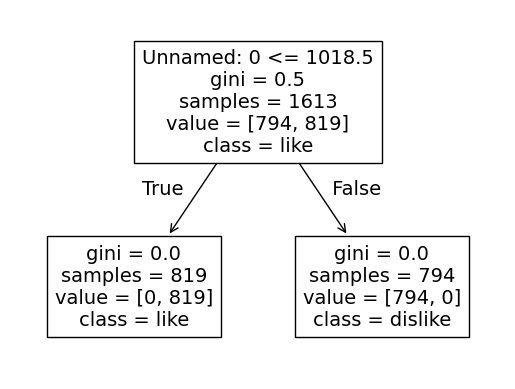

In [47]:
# BEGIN SOLUTION
spotify_no_ind_df = pd.read_csv("data/spotify.csv")
X = spotify_no_ind_df.drop(columns=["target", "artist", "song_title"])
y = spotify_no_ind_df["target"]
X_train_no_ind, X_test_no_ind, y_train_no_ind, y_test_no_ind = train_test_split(
    X, y, test_size=0.2, random_state=123
)

no_ind_tree = DecisionTreeClassifier(random_state=123)
no_ind_tree.fit(X_train_no_ind, y_train_no_ind)
tree_viz = tree.plot_tree(no_ind_tree, feature_names = X_train_no_ind.columns, class_names=['dislike', 'like']); 
tree_viz;
# END SOLUTION

In [48]:
# BEGIN SOLUTION
no_ind_tree.score(X_train_no_ind, y_train_no_ind)
# END SOLUTION

1.0

In [49]:
# BEGIN SOLUTION 
no_ind_tree.score(X_test_no_ind, y_test_no_ind)
# END SOLUTION

0.9975247524752475

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    

### (Challenging) 5.2 Shuffling
rubric={reasoning}

By default, `train_test_split()` function shuffles the data before splitting. 

**Your tasks:**
1. What would be the consequences of splitting the data without shuffling it and using this unshuffled data in modeling?
2. Examine whether shuffling the data improves the CV scores and test score in the Spotify dataset.
</div>

<div class="alert alert-warning">

Solution_5.2
    
</div>

_Points:_ 1

_Type your answer here, replacing this text._

In [50]:
# BEGIN SOLUTION 
X_spotify = spotify_df.drop(columns=["target", "artist", "song_title"])
y_spotify = spotify_df["target"]
# END SOLUTION 

In [51]:
# BEGIN SOLUTION 
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_spotify, y_spotify, test_size=0.2, shuffle=False
)
# END SOLUTION

In [52]:
# BEGIN SOLUTION 
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_ns, y_train_ns)
print("Dummy model (without shuffling)")
print("Train scores: ", dummy_clf.score(X_train_ns, y_train_ns))
print(
    "Mean cross-validation score: ",
    cross_val_score(dummy_clf, X_train_ns, y_train_ns).mean(),
)
print("Test scores: ", dummy_clf.score(X_test_ns, y_test_ns))
# END SOLUTION

Dummy model (without shuffling)
Train scores:  0.6323620582765034
Mean cross-validation score:  0.6323635174893756
Test scores:  0.0


In [53]:
# BEGIN SOLUTION
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train_ns, y_train_ns)
print("Decision tree model (without shuffling)")
print("Train scores (without shuffling): ", model.score(X_train_ns, y_train_ns))
print(
    "Mean cross-validation score (without shuffling): ",
    cross_val_score(model, X_train_ns, y_train_ns).mean(),
)
print("Test scores (without shuffling): ", model.score(X_test_ns, y_test_ns))
# END SOLUTION

Decision tree model (without shuffling)
Train scores (without shuffling):  0.9981401115933044
Mean cross-validation score (without shuffling):  0.6812933869199854
Test scores (without shuffling):  0.504950495049505


Let's try splitting the data **with** shuffling.

In [54]:
# BEGIN SOLUTION
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(
    X_spotify, y_spotify, test_size=0.2, shuffle=True
)
# END SOLUTION

In [55]:
# BEGIN SOLUTION
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_sh, y_train_sh)
print("Dummy model (with shuffling)")
print("Train scores (with shuffling): ", dummy_clf.score(X_train_sh, y_train_sh))
print(
    "Mean cross-validation score (with shuffling): ",
    cross_val_score(dummy_clf, X_train_sh, y_train_sh).mean(),
)
print("Test scores (with shuffling): ", dummy_clf.score(X_test_sh, y_test_sh))
# END SOLUTION

Dummy model (with shuffling)
Train scores (with shuffling):  0.5021698698078115
Mean cross-validation score (with shuffling):  0.5021710285945041
Test scores (with shuffling):  0.4628712871287129


In [56]:
# BEGIN SOLUTION
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train_sh, y_train_sh)
print("Decision tree model (with shuffling)")
print("Train scores (with shuffling): ", model.score(X_train_sh, y_train_sh))
print(
    "Mean cross-validation score (with shuffling): ",
    cross_val_score(model, X_train_sh, y_train_sh).mean(),
)
print("Test scores (with shuffling): ", model.score(X_test_sh, y_test_sh))
# END SOLUTION

Decision tree model (with shuffling)
Train scores (with shuffling):  0.9993800371977681
Mean cross-validation score (with shuffling):  0.6714266484625887
Test scores (with shuffling):  0.6955445544554455


The test accuracies for both the `DummyClassifier` and the `DecisionTreeClassifier` when we split with shuffled data or when we used `train_test_split` are markedly better than when split without shuffling. The reason is that the dataset is sorted by the target. So when we split the data without shuffling, the model was mostly exposed to positive examples and not many negative examples.  

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) 5.3 Exploring datasets and features
rubric={reasoning}

In Exercise 4.1, you systematically searched for a model using cross-validation that is likely to generalize well . 

**Your tasks:**

Provide thoughtful answers to the following questions:
1. Does this model use all the features provided to it? Which features appear to be the most important, and does this align with what you observed during exploratory data analysis? Please briefly explain.
2. In this assignment, we are considering all numeric features. However, are the "key," "mode," and "time_signature" features actually numeric? You can check the documentation of these features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).
3. It's worth noting that the "acousticness" and "duration_ms" features are on entirely different scales. Does this difference in scale matter when we train a `DecisionTreeClassifier`? Please briefly explain.
4. Suppose you believe that the "artist" is a valuable feature for this task. How would you encode it in order to use it with `sklearn`?
</div>

<div class="alert alert-warning">

Solution_5.3
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [57]:
## Part 1
# BEGIN SOLUTION
feat_importances_df = pd.DataFrame(
    data = {
        "features": best_model.feature_names_in_,
        "feature_importances": best_model.feature_importances_
    }
).sort_values("feature_importances", ascending=False)
feat_importances_df
# END SOLUTION

,features,feature_importances
4,instrumentalness,0.266685
3,energy,0.168315
9,speechiness,0.127227
7,loudness,0.118370
1,danceability,0.113787
12,valence,0.082387
0,acousticness,0.050924
2,duration_ms,0.049621
10,tempo,0.022686
8,mode,0.000000


According to the model, `instrumentalness` appears to be the most important feature, followed by `energy`, which aligns with our observations during the exploratory data analysis. The feature importances for `key`, `liveliness`, `mode`, and `time_signature` are 0.0, indicating that these features were not used by the model.


In [58]:
## Part 2:
# BEGIN SOLUTION
X_train['mode'].value_counts()
# END SOLUTION

mode
1    1002
0     611
Name: count, dtype: int64

The `mode` feature is a binary feature with only two possible values: 0 and 1. 

In [59]:
# BEGIN SOLUTION
X_train['key'].value_counts()
# END SOLUTION

key
1     200
7     169
0     166
9     152
2     145
11    143
5     141
6     127
10    122
8     110
4      88
3      50
Name: count, dtype: int64

The `key` feature is encoded as integers ranging from 0 to 11. However, it is actually a categorical feature, as there is no inherent ordering between the keys (e.g., D is not 'greater' or 'higher' than C in a musical context). They simply categorize the tracks into one of 12 possible keys.

In [60]:
# BEGIN SOLUTION
X_train['time_signature'].value_counts()
# END SOLUTION

time_signature
4.0    1514
3.0      76
5.0      22
1.0       1
Name: count, dtype: int64

The `time_signature feature` indicates the time signature of the track, which describes how many beats are in each bar (or measure) of the song. 
This feature helps determine the rhythmic structure of a track, but like the key feature, it categorizes data without establishing a hierarchical order.

In [61]:
## part 3 
# BEGIN SOLUTION
X_train['acousticness']
# END SOLUTION

1505    0.004770
813     0.114000
615     0.030200
319     0.106000
320     0.021100
          ...   
2012    0.001060
1346    0.000021
1406    0.503000
1389    0.705000
1534    0.623000
Name: acousticness, Length: 1613, dtype: float64

In [62]:
# BEGIN SOLUTION
X_train['acousticness'].min(), X_train['acousticness'].max() 
# END SOLUTION

(np.float64(4.61e-06), np.float64(0.995))

In [63]:
# BEGIN SOLUTION
X_train['duration_ms']
# END SOLUTION

1505    214740
813     216728
615     216585
319     194040
320     236456
         ...  
2012    274404
1346    203500
1406    256333
1389    222307
1534    394920
Name: duration_ms, Length: 1613, dtype: int64

In [64]:
# BEGIN SOLUTION
X_train['duration_ms'].min(), X_train['duration_ms'].max() 
# END SOLUTION

(np.int64(16042), np.int64(849960))

The features are on completely different scales, but this does not affect decision tree models because they do not rely on the magnitude of features. Instead, these models focus on individual features and their threshold values one at a time. Therefore, whether the features are scaled or not does not alter the hierarchical structure of the trees or the resulting splits based on those features.

In [65]:
## Part 4 
# BEGIN SOLUTION
spotify_df['artist']
# END SOLUTION

0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object

The artist feature could be a valuable predictor since users often have preferences for specific artists. However, encoding this feature is challenging due to the large number of unique artist names, which makes pattern detection difficult. One approach to encoding this feature could involve grouping similar artists or categorizing artists by their music type, and then treating these categories as a categorical variable. 

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make at least three commits to your Github repository. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.
- [ ] Include the link to your lab GitHub repository below the instructions.  


Congratulations on finishing lab 1! Well done 👏👏! 

![](img/eva-well-done.png)